In [9]:
import scipp as sc
import numpy as np
import matplotlib.pyplot as plt
import plopp as pp
%matplotlib widget

import sys
print(sys.path)

from easyCore.Objects.Variable import Parameter
from easyCore.Objects.ObjectClasses import BaseObj
from easyCore.Fitting.Fitting import Fitter

['c:\\Users\\henrikjacobsen3\\Documents\\easyScience\\EasyQENSMockup\\EasyQENSMockup\\JupyterExample', 'c:\\Users\\henrikjacobsen3\\AppData\\Local\\anaconda3\\envs\\QENSMockup\\python312.zip', 'c:\\Users\\henrikjacobsen3\\AppData\\Local\\anaconda3\\envs\\QENSMockup\\DLLs', 'c:\\Users\\henrikjacobsen3\\AppData\\Local\\anaconda3\\envs\\QENSMockup\\Lib', 'c:\\Users\\henrikjacobsen3\\AppData\\Local\\anaconda3\\envs\\QENSMockup', '', 'c:\\Users\\henrikjacobsen3\\AppData\\Local\\anaconda3\\envs\\QENSMockup\\Lib\\site-packages', 'c:\\Users\\henrikjacobsen3\\AppData\\Local\\anaconda3\\envs\\QENSMockup\\Lib\\site-packages\\win32', 'c:\\Users\\henrikjacobsen3\\AppData\\Local\\anaconda3\\envs\\QENSMockup\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\henrikjacobsen3\\AppData\\Local\\anaconda3\\envs\\QENSMockup\\Lib\\site-packages\\Pythonwin']


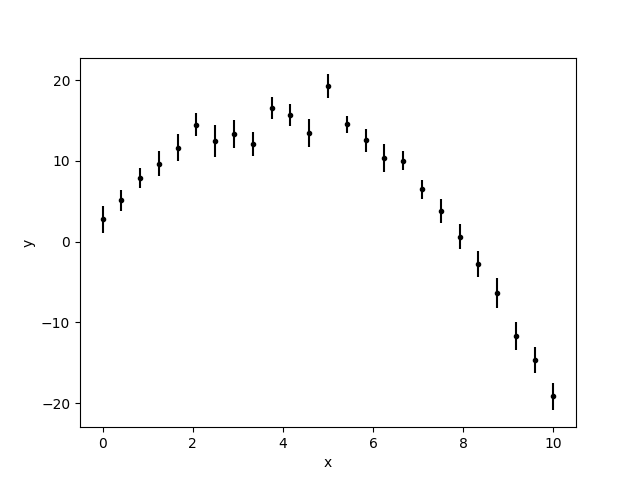

In [4]:

np.random.seed(123)

a_true = -0.9594
b_true = 7.294
c_true = 3.102

N = 25
x = np.linspace(0, 10, N)
yerr = 1 + 1 * np.random.rand(N)
y = a_true * x ** 2 + b_true * x + c_true
y += np.abs(y) * 0.1 * np.random.randn(N)

plt.errorbar(x, y, yerr, marker='.', ls='', color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
from easyCore.Objects.Variable import Parameter

a = Parameter(name='a', value=a_true, fixed=False)
b = Parameter(name='b', value=b_true, fixed=False)
c = Parameter(name='c', value=c_true, fixed=False)

def math_model(x: np.ndarray) -> np.ndarray:
    """
    Mathematical model for a quadratic. 
    
    :x: values to calculate the model over. 
    
    :return: model values.
    """
    return a.raw_value * x ** 2 + b.raw_value * x + c.raw_value

a

<Parameter 'a': -0.9594+/-0, bounds=[-inf:inf]>

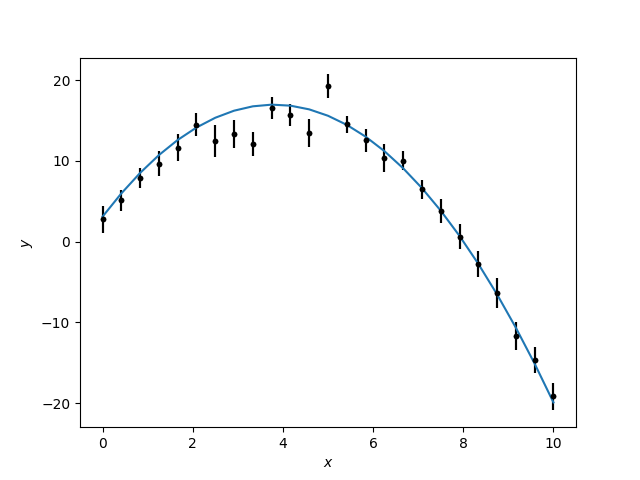

In [8]:
plt.errorbar(x, y, yerr, marker='.', ls='', color='k')
plt.plot(x, math_model(x), '-')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [11]:


quad = BaseObj(name='quad', a=a, b=b, c=c)
f = Fitter(quad, math_model)

res = f.fit(x=x, y=y, weights=1/yerr)
a, b, c

(<Parameter 'a': -0.95+/-0.04, bounds=[-inf:inf]>,
 <Parameter 'b': 7.3+/-0.4, bounds=[-inf:inf]>,
 <Parameter 'c': 2.0+/-0.8, bounds=[-inf:inf]>)

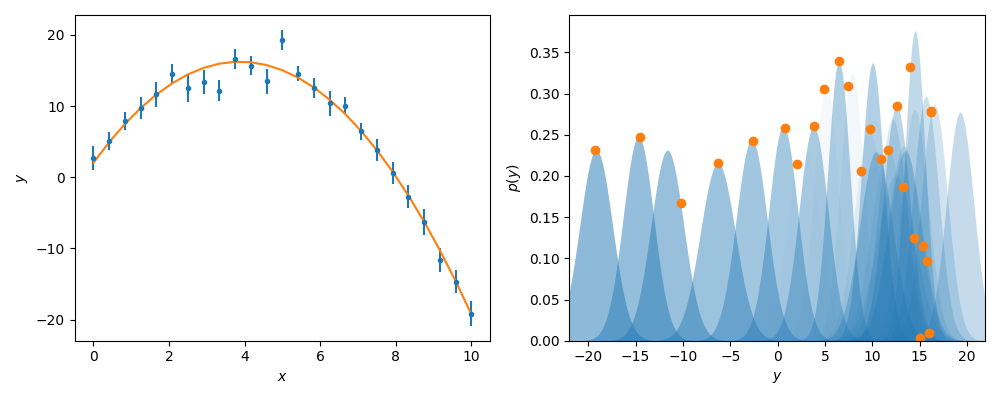

In [12]:
from scipy.stats import norm

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].errorbar(x, y, yerr, marker='.', ls='', color='C0')
ax[0].plot(x, math_model(x), '-', color='C1')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')

y_range = np.arange(-22, 22, 0.1)
for i, yy in enumerate(y):
    ax[1].fill_between(y_range, norm(yy, yerr[i]).pdf(y_range), color='C0', alpha=0.02 * (i + 1), lw=0)
    ax[1].plot(math_model(x[i]), norm(yy, yerr[i]).pdf(math_model(x[i])), 'C1o')
ax[1].set_xlim(y_range.min(), y_range.max())
ax[1].set_ylim(0, None)
ax[1].set_xlabel('$y$')
ax[1].set_ylabel('$p(y)$')
plt.tight_layout()
plt.show()